In [1]:
import pandas as pd 
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Spotify Song Attribute EDA

In [2]:
# Import Dataset
# Data from: https://www.kaggle.com/geomack/spotifyclassification
data = pd.read_csv('data.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [7]:
# EDA to visualize data and observe structure
train, test = train_test_split(data, test_size = 0.15)

In [8]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1714; Test size: 303


In [9]:
# Custom Color Palette 
red_blue = ['#9a0200', '#26538d'] # deep red, dusk blue
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
train.shape, test.shape

((1714, 17), (303, 17))

In [11]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_danceability = data[data['target'] == 1]['danceability']
neg_danceability = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

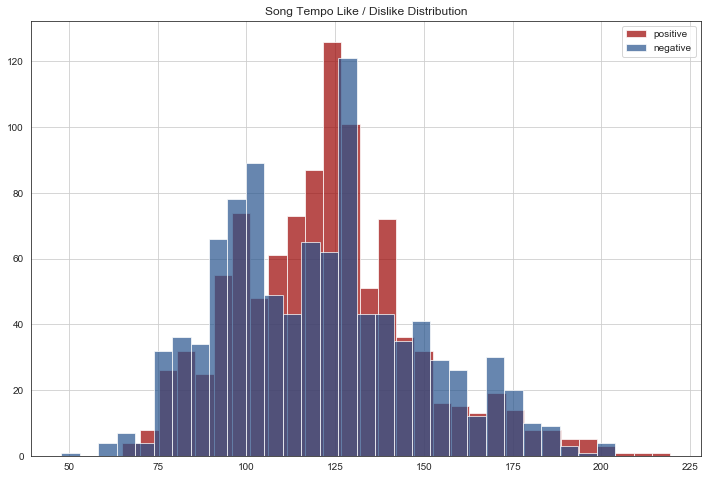

In [12]:
fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins=30, label = 'positive')
neg_tempo.hist(alpha = 0.7, bins=30, label = 'negative')
plt.legend(loc = 'upper right')

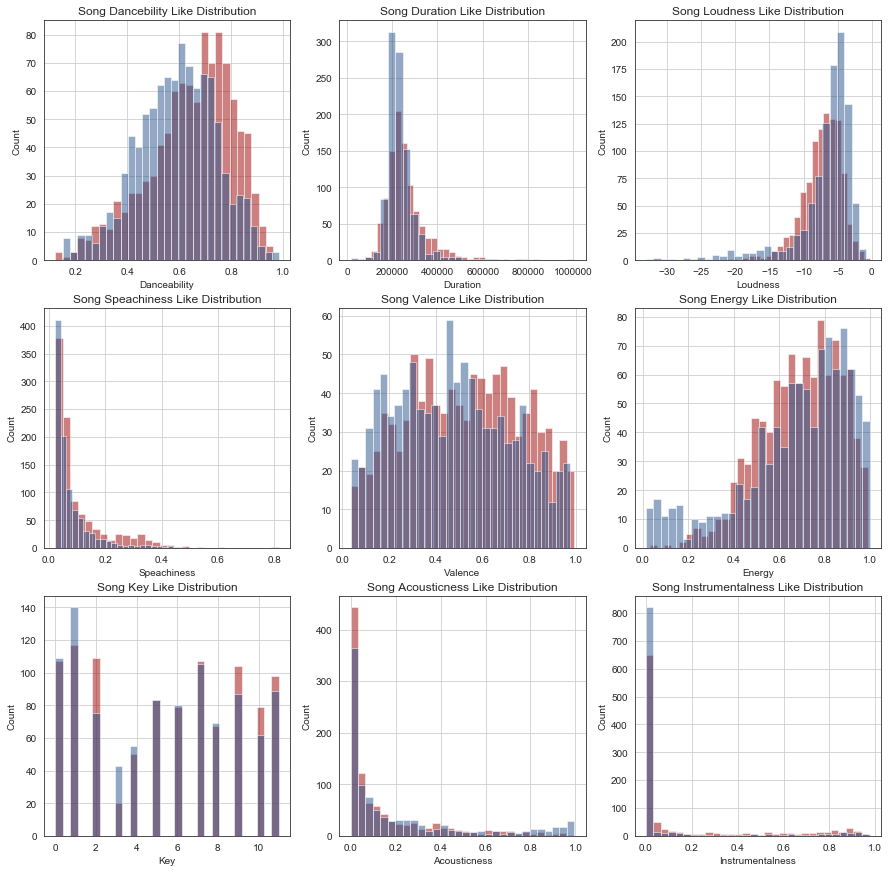

In [13]:
fig2 = plt.figure(figsize = (15,15))

# Danceability 
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Dancebility Like Distribution')
pos_danceability.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha = 0.5, bins = 30)

# Duration 
ax3 = fig2.add_subplot(332)
ax3.set_xlabel('Duration')
ax3.set_ylabel('Count')
ax3.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(332)
neg_duration.hist(alpha = 0.5, bins = 30)

# Loudness 
ax3 = fig2.add_subplot(333)
ax3.set_xlabel('Loudness')
ax3.set_ylabel('Count')
ax3.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(333)
neg_loudness.hist(alpha = 0.5, bins = 30)

# Speachiness 
ax3 = fig2.add_subplot(334)
ax3.set_xlabel('Speachiness')
ax3.set_ylabel('Count')
ax3.set_title('Song Speachiness Like Distribution')
pos_speechiness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(334)
neg_speechiness.hist(alpha = 0.5, bins = 30)

# Valence 
ax3 = fig2.add_subplot(335)
ax3.set_xlabel('Valence')
ax3.set_ylabel('Count')
ax3.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(335)
neg_valence.hist(alpha = 0.5, bins = 30)

# Energy 
ax3 = fig2.add_subplot(336)
ax3.set_xlabel('Energy')
ax3.set_ylabel('Count')
ax3.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(336)
neg_energy.hist(alpha = 0.5, bins = 30)

# Key 
ax3 = fig2.add_subplot(337)
ax3.set_xlabel('Key')
ax3.set_ylabel('Count')
ax3.set_title('Song Key Like Distribution')
pos_key.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(337)
neg_key.hist(alpha = 0.5, bins = 30)

# Acousticness 
ax3 = fig2.add_subplot(338)
ax3.set_xlabel('Acousticness')
ax3.set_ylabel('Count')
ax3.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(338)
neg_acousticness.hist(alpha = 0.5, bins = 30)

# Instrumentalness 
ax3 = fig2.add_subplot(339)
ax3.set_xlabel('Instrumentalness')
ax3.set_ylabel('Count')
ax3.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha = 0.5, bins = 30)

In [14]:
# Train a classifier - Decision Tree
c = DecisionTreeClassifier(min_samples_split=50)

In [15]:
features = ['danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'key', 'acousticness', 'instrumentalness']

In [16]:
x_train = train[features]
y_train = train['target']
x_test = test[features]
y_test = test['target']

In [17]:
dt = c.fit(x_train, y_train)

In [18]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

In [19]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Gosia\Anaconda3\release\bin'

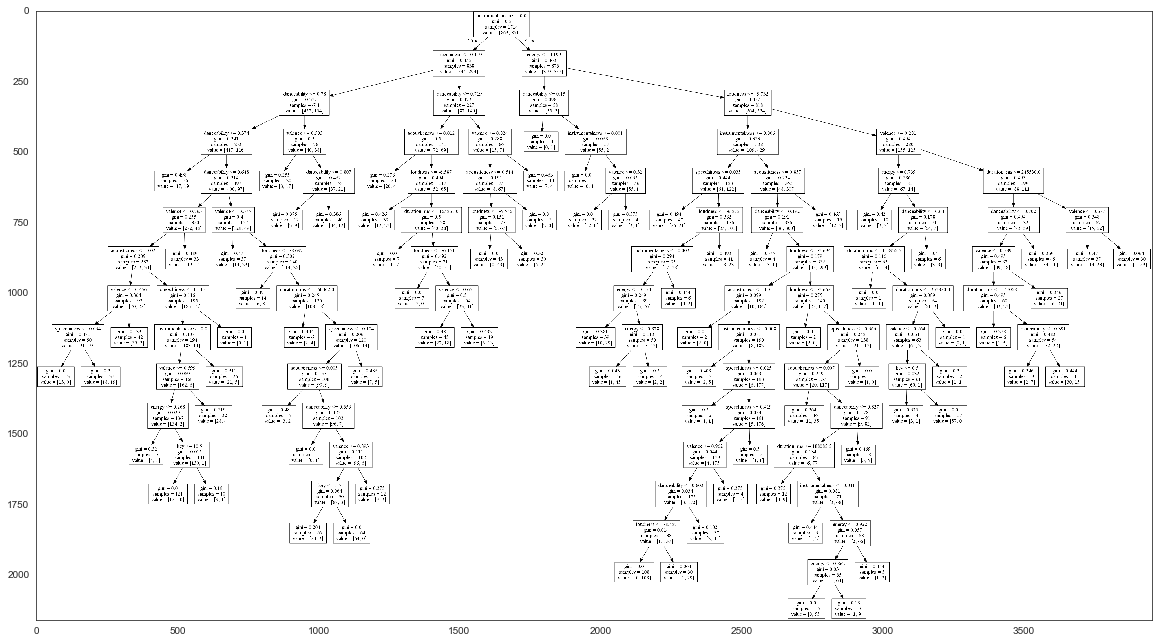

In [20]:
show_tree(dt, features, 'dec_tree_01.png')

In [21]:
# Predict target using the trained calssifier

In [22]:
y_pred = c.predict(x_test)

In [23]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) *100 

In [25]:
print("Accuracy using Decision Tree:  ", round(score,1), "%")

Accuracy using Decision Tree:   70.3 %
